Source: [An Awesome Tutorial to Learn Outlier Detection in Python using PyOD Library](https://www.analyticsvidhya.com/blog/2019/02/outlier-detection-python-pyod/)

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.font_manager

from pyod.models.abod import ABOD  # Angle Based Outlier Detector
from pyod.models.knn import KNN # K Nearest Neighbors

from pyod.utils.data import generate_data, get_outliers_inliers

# generate random data with two featrue

## Generate random data with two featrue

In [2]:
X_train, Y_train = generate_data(n_train = 300, train_only = True, n_features = 2)

outlier_fraction = 0.1

In [3]:
x_outliers, x_inliers = get_outliers_inliers(X_train, Y_train)

n_inliers = len(x_inliers)
n_outliers = len(x_outliers)

In [4]:
df = pd.DataFrame(X_train,Y_train)
df.reset_index(inplace = True)
df.rename(columns = {'index' : 'label'}, inplace = True)

In [5]:
# Seperate the two featrues and use it to plot the data
F1 = X_train[:,[0]].reshape(-1,1)
F2 = X_train[:,[1]].reshape(-1,1)

In [6]:
# Create a Meshgrid
xx, yy = np.meshgrid(np.linspace(-10, 10, 200), np.linspace(-10, 10, 200))

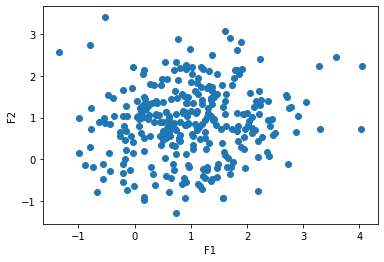

In [7]:
plt.scatter(F1,F2)
plt.xlabel('F1')
plt.ylabel('F2')

plt.show()

In [8]:
classifiers = {
    'Angle-based Outlier Detector (ABOD)' : ABOD(contamination = outlier_fraction),
    'K Nearest Neighbors (KNN)' : KNN(contamination = outlier_fraction)
}

In [10]:
classifiers.values()

dict_values([ABOD(contamination=0.1, method='fast', n_neighbors=5), KNN(algorithm='auto', contamination=0.1, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=5, p=2,
  radius=1.0)])

No of Errors : Angle-based Outlier Detector (ABOD) 5
No of Errors : K Nearest Neighbors (KNN) 2


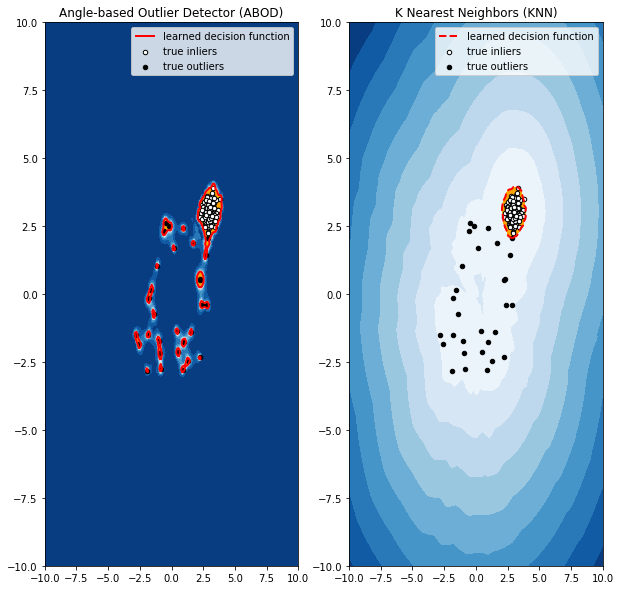

In [43]:
plt.figure(figsize = (10,10))

for i, (clf_name, clf) in enumerate(classifiers.items()):
    # fit the dataset model
    clf.fit(X_train)
    
    # prediction of datapoint categoryt outlier or inlier
    score_pred = clf.decision_function(X_train)*-1
    
    # prediction of a datapoint category outlier or inlier
    y_pred = clf.predict(X_train)
    
    # no of errors in prediction
    n_errors = (y_pred != Y_train).sum()
    print('No of Errors :', clf_name, n_errors)
    
    # Visualization #
    
    # Threshold value to consider a datapoint inlier or outlier
    threshold = stats.scoreatpercentile(score_pred, 100 * outlier_fraction) 
    
    # decision function caculcates the raw anomaly score for every point
    z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()]) * -1
    z = z.reshape(xx.shape)
    
    subplot = plt.subplot(1, 2, i+1)
    
    # fill blue colormap from minimum anomaly score to threshold value
    subplot.contourf(xx, yy, z, levels = np.linspace(z.min(), threshold, 10), cmap = plt.cm.Blues_r)
    
    # draw red contour line where anomaly score is equal to threshlod
    a = subplot.contour(xx, yy, z, levels = [threshold], linewidths = 2, colors = 'red')
    
    subplot.contourf(xx, yy, z, levels = [threshold, z.max()], colors = 'orange')
    # scatter plot of inliers with white dots
    b = subplot.scatter(X_train[:-n_outliers:, 0], X_train[:-n_outliers, 1], c = 'white', s = 20, edgecolor = 'k')
    
    # scatter plot of outliers with black dots
    c = subplot.scatter(X_train[-n_outliers:, 0], X_train[-n_outliers:, 1], c = 'black', s = 20, edgecolor = 'k')
    subplot.axis('tight')
    
    subplot.legend([a.collections[0], b, c],
                  ['learned decision function', 'true inliers', 'true outliers'],
                  prop = matplotlib.font_manager.FontProperties(size = 10),
                  loc = 'best')
    
    subplot.set_title(clf_name)
    subplot.set_xlim((-10, 10))
    subplot.set_ylim((-10, 10))

plt.show()